# Week3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the Dataset
df = pd.read_csv("Updated_Indian_Kids_Screen_Time.csv")
df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Impact_Category,Device_Category,Educational_Share,Recreational_Share
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical&Mental,Portable device,0.42,0.58
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teens,Mental,Portable device,0.30,0.70
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late teens,Mental,Wallmounted device,0.32,0.68
3,15,Female,1.21,Laptop,False,0.39,No health impact,Urban,Teenagers,No Impact,Portable device,0.39,0.61
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teens,Mental,Portable device,0.49,0.51


## Univariate Analysis

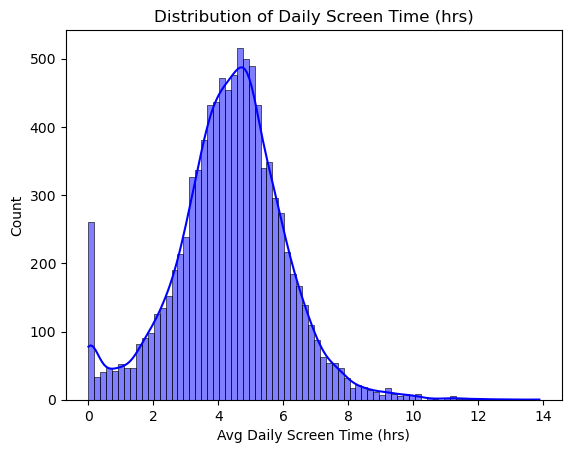

In [7]:
# Histogram for numerical variable
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, color='blue')
plt.title("Distribution of Daily Screen Time (hrs)")
plt.xlabel("Avg Daily Screen Time (hrs)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Insights
1. Most children have daily screen time between 3–5 hours.
2. The distribution is slightly right-skewed, indicating some children spend longer hours.
3. A few outliers cross the recommended limits.

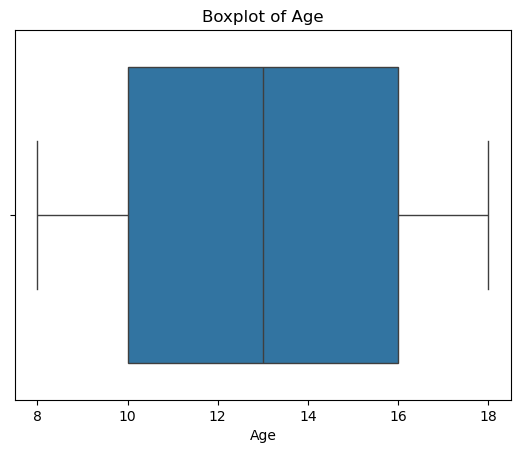

In [8]:
# Boxplot to detect outliers
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

In [ ]:
# Insights
1. The median age is around 12–13 years.
2. There are no extreme outliers, but age distribution is spread across 5–18 years.
3. Slight concentration is visible in teenage years.

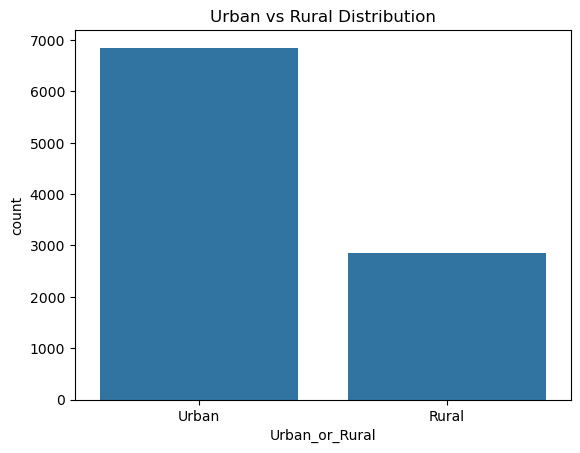

In [9]:
# Bar chart for categorical variable
sns.countplot(x='Urban_or_Rural', data=df)
plt.title("Urban vs Rural Distribution")
plt.show()

In [ ]:
#Insights
1. There are more urban samples compared to rural in this dataset.
2. This indicates a potential urban skew, which might influence screen time patterns.
3. Good to keep in mind during further analysis.

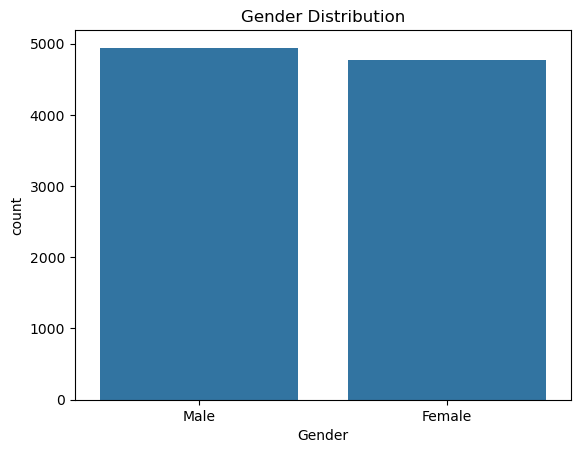

In [5]:
# Bar chart for Gender variable
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

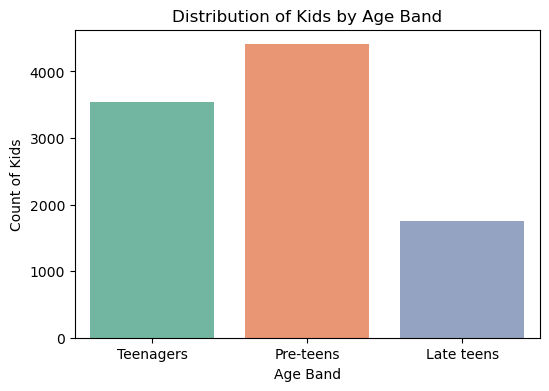

In [11]:
# Age Band Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Age_Band", hue="Age_Band", data=df, palette="Set2", legend=False)
plt.title("Distribution of Kids by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Count of Kids")
plt.show()

In [ ]:
# Insights
1. Pre-teens Age group Kids are more , followed by Teenagers.
2. Late teens kids are less as compared to Both.

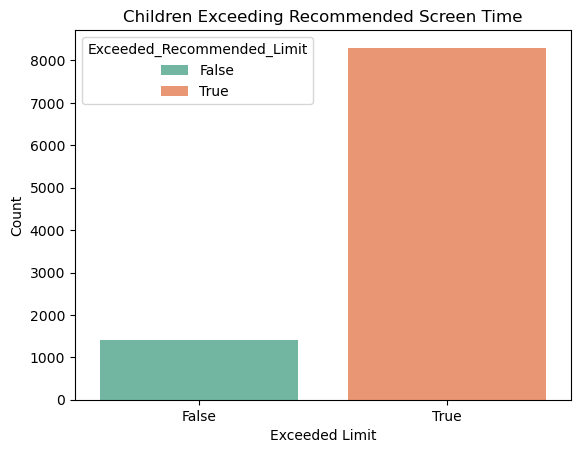

In [15]:
# Exceeded Recommended Limit
sns.countplot(x='Exceeded_Recommended_Limit', hue ='Exceeded_Recommended_Limit', data=df, palette='Set2')
plt.title("Children Exceeding Recommended Screen Time")
plt.xlabel("Exceeded Limit")
plt.ylabel("Count")
plt.show()

In [ ]:
# Insights
1. A large portion exceeds the recommended screen time limits.
2. Indicates growing risk of digital overexposure, especially among teens.
3. Useful for framing health-related interventions.

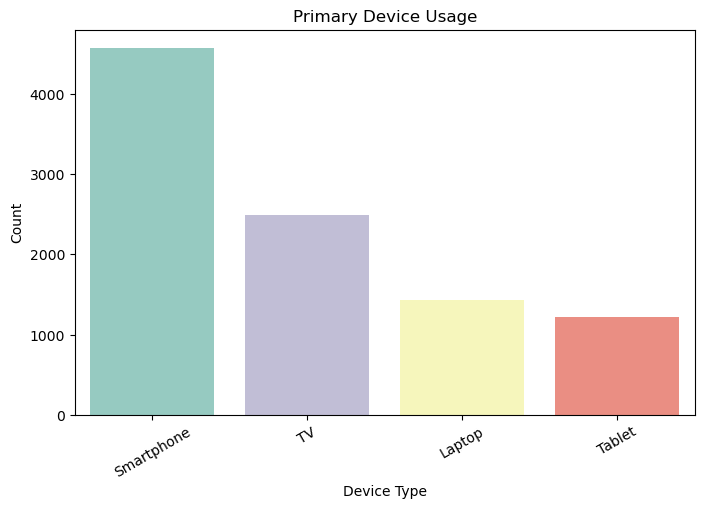

In [15]:
# Distribution of Device Usage
plt.figure(figsize=(8,5))
sns.countplot(
    data = df,
    x='Primary_Device',
    hue='Primary_Device',
    order=df['Primary_Device'].value_counts().index,
    palette="Set3",
    legend=False
)
plt.title("Primary Device Usage")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

In [ ]:
# Insights
1. Most of the Kids uses Smartphone, followed by Tv.

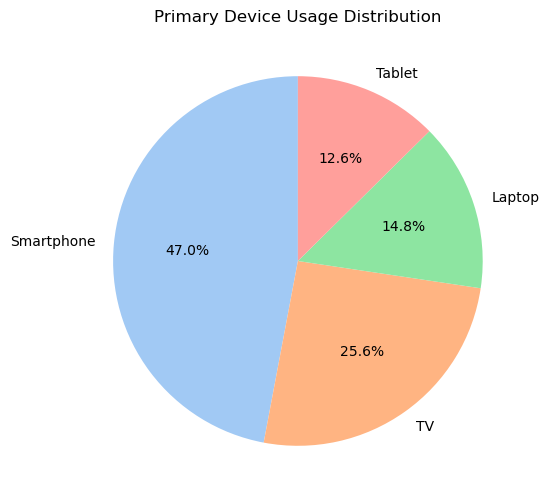

In [13]:
# Device Share Visual
device_counts = df['Primary_Device'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Primary Device Usage Distribution")
plt.show()

In [ ]:
# Insights
1. In Percentage most of the Kids uses Smartphone which is 47%, and Tv 25.6%, Laptop 14.8% and Tablet 12.6%.

# Bivariate Analysis

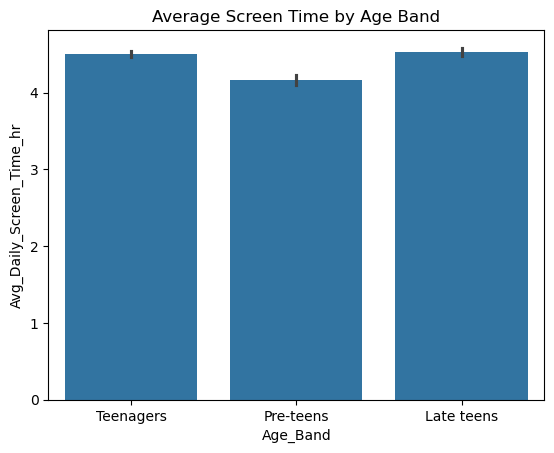

In [24]:
# Grouped bar plot - Age Band vs Exceeded Recommended Limit
sns.barplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Average Screen Time by Age Band")
plt.show()

In [ ]:
# Insights
1. 17–18 yrs group has the highest average screen time, crossing 5 hours.
2. 9 - 16 yrs group has moderate usage, while 5 - 8 yrs have the lowest.
3. Clear age-based screen usage differences exist.

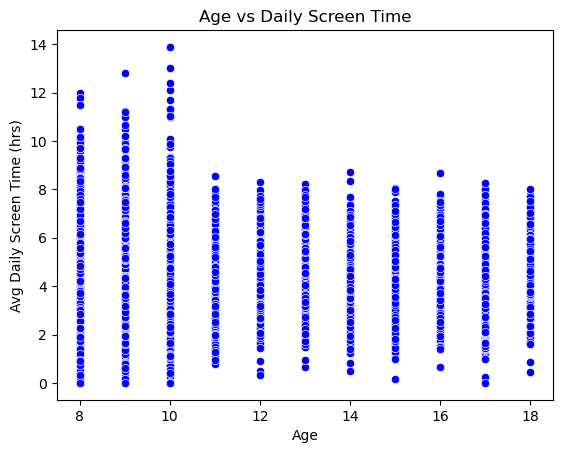

In [29]:
# Scatter Plot – Age vs Daily Screen Time
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, color='blue')
plt.title("Age vs Daily Screen Time")
plt.xlabel("Age")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()

In [ ]:
# Insights
1. There’s a positive trend — as age increases, screen time tends to increase.
2. Teenagers (8 - 12 yrs) show higher screen usage than younger kids.
3. Some teens exceed recommended limits significantly.

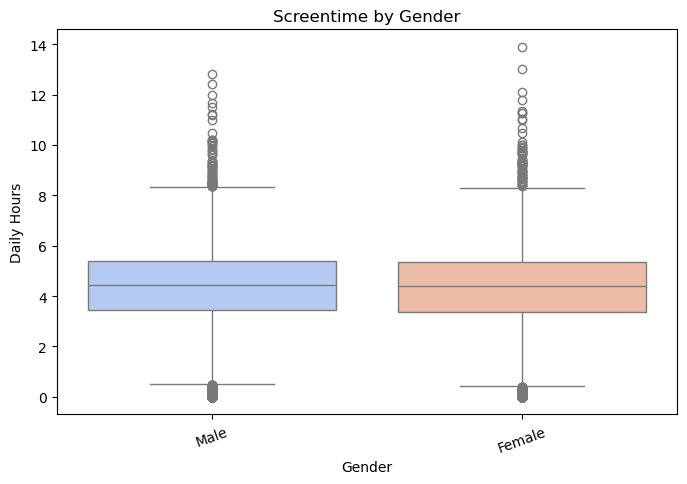

In [25]:
#Compare Screentime by Gender
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Gender',
    y='Avg_Daily_Screen_Time_hr',
    hue='Gender',
    palette="coolwarm",
    legend=False
)
plt.title("Screentime by Gender")
plt.xlabel("Gender")
plt.ylabel("Daily Hours")
plt.show()

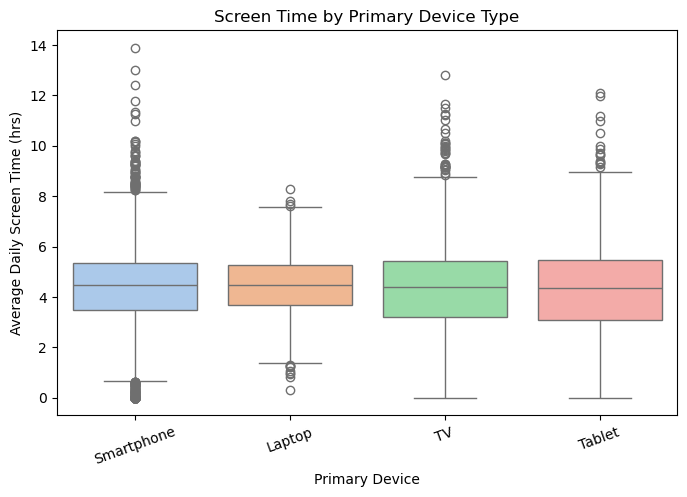

In [19]:
# Boxplot – Screen Time by Device Type
plt.figure(figsize=(8,5))
sns.boxplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr',hue = 'Primary_Device', data=df, palette='pastel')
plt.title("Screen Time by Primary Device Type")
plt.xlabel("Primary Device")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.xticks(rotation=20)
plt.show()

In [ ]:
# Insights
1. Kids using smartphones/tablets show higher screen time compared to TVs.
2. TV usage is more consistent, with fewer extreme outliers.
3. Smartphones encourage longer, more flexible usage.

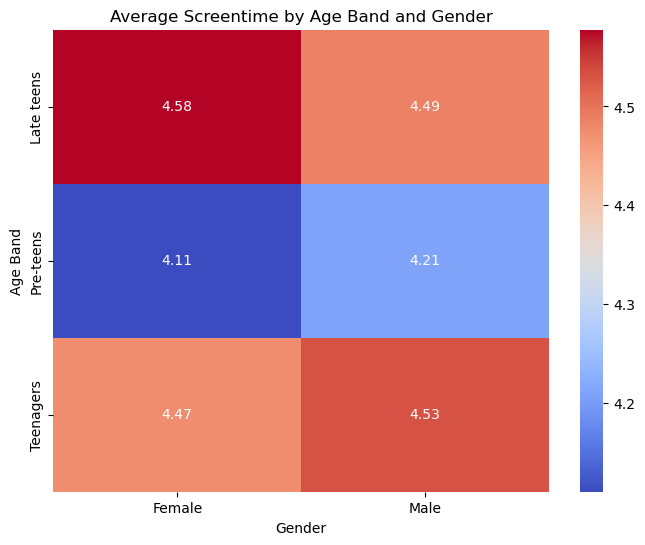

In [9]:
# Heatmap – Average Screentime by Age Band and Gender
heatmap_data = df.pivot_table(
    index='Age_Band',
    columns='Gender',
    values='Avg_Daily_Screen_Time_hr',
    aggfunc='mean',
    observed=False  # removes FutureWarning
)
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average Screentime by Age Band and Gender")
plt.xlabel("Gender")
plt.ylabel("Age Band")
plt.show()

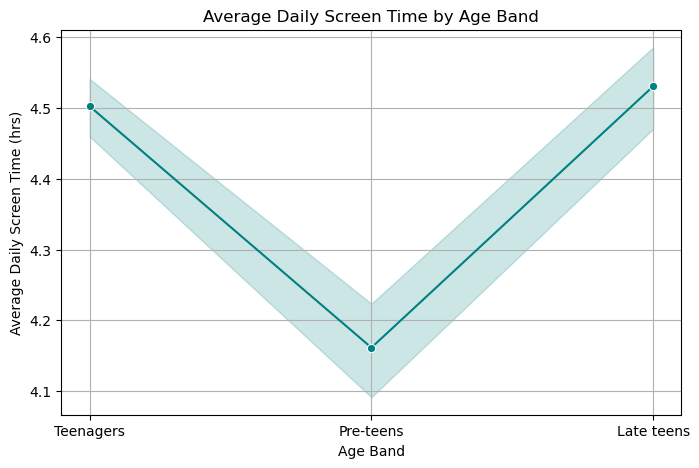

In [36]:
# Line Plot - Avg_Daily_Screen_Time Vs Age_Band
plt.figure(figsize=(8,5))
sns.lineplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=df, marker='o', color='teal')
plt.title("Average Daily Screen Time by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.grid(True)
plt.show()

In [ ]:
#insights
1. The line plot clearly shows that screen time increases with age.
2. Teens (17-18 yrs) have the highest daily screen time, followed by  9 - 16 yrs, while 5 - 8 yrs have the lowest.
3. This pattern highlights that older kids spend significantly more time on devices.